# TCC Strictu Sensu - Algoritmo de Classificação Binária: Melanoma versus Nevus.


## 1. Definição do Problema

*Por que?*
Câncer de pele é um dos cânceres mais comuns na atualidade, se identificado no início, pode ser mais facilmente tratado. A conscientização é muito importante, devemos informar a população de modo geral e facilitar o teste, como por exemplo um simples carregar de uma foto em um aplicativo que já te retornará as chances de ser uma pinta ou mancha na pele se desenvolver em um câncer de pele.
 
*Quem?*
Este projeto visa ajudar todos que tiverem acesso a internet, ou smartphones, provendo uma maneira fácil de avaliar se pintas ou manchas na pele podem ser um câncer de pele em estágio inicial
 
*O que?*
Um modelo de machine learning(mais precisamente deep learninng) que permitirá que usuários externos testem pintas ou manchas, buscando por possíveis câncer de pele.
 
*Quando?*
O modelo deverá responder de maneira instantânea, ou mais próxima ao tempo real, como por exemplo entre 1 a 5 minutos.
 
*Onde?*
A princípio através de input manual nesse projeto, mas no futuro usuários poderão carregar e testar imagens por um site ou aplicativo de Smartphone.


## 2. Coleta dos Dados

Segundo os requisitos deste projeto, duas bases de dados são requeridas. O tema deste projeto tem sido muito trabalhado por vários projetos ao longo dos últimos anos, porém existem apenas algumas bases muito populares, praticamente todas providas pela mesma fonte a ISIC que anualmente (desde 2016) tem lançado um desafio de Machine Learning e providenciado datasets com milhares de imagens com este tema. Entretanto como exigência do projeto tive de buscar uma base de dados distinta e após pesquisa encontrei um dataset pequeno mas que me fornece imagens de Nevus normais e melanoma. A fim de unir as bases precisei reduzir o escopo do dataset provido pela HAM10000 (Imagens colhidas pela ISIC em 2018), em apenas Nevus normais ou melanomas.

In [1]:
import pandas as pd
import shutil
import os

In [2]:
FINAL_PATH = "dataset_final//imagens//"

In [4]:
path_HAM10000 = "dataset_1//HAM10000_images//"
df_HAM10000_csv = "dataset_1//HAM10000_metadata.csv"

df_HAM10000_csv = pd.read_csv(df_HAM10000_csv)

#Tamanho original
print('Tamanho Original: ', df_HAM10000_csv.shape)

#Filtrando apenas melanocytic nevi (begnigno) e melanoma(maligno), 
#o resto da base será desconsiderado para este estudo.
df_HAM10000_csv_filtered=df_HAM10000_csv[(df_HAM10000_csv.dx == "nv") | (df_HAM10000_csv.dx == "mel")]

#Tamanho após filtrado
print('Tamanho após aplifcar o filtro: ', df_HAM10000_csv_filtered.shape)

#Movendo os arquivos para Pasta Final
for index, row in df_HAM10000_csv_filtered.iterrows(): 
    shutil.copy2(path_HAM10000 + row['image_id'] + '.jpg', FINAL_PATH)

Tamanho Original:  (10015, 8)
Tamanho após aplifcar o filtro:  (7818, 8)


In [5]:
df_mednode = pd.DataFrame(columns=['image_id','type'])
path_mednode = "dataset_2//complete_mednode_dataset//"

for diretorio,subpasta, arquivos in os.walk(path_mednode):
    if diretorio !="dataset_2//complete_mednode_dataset//":
        for arquivo in arquivos:
            if 'melanoma' in diretorio:
                df_mednode=df_mednode.append({'image_id': arquivo.replace('.jpg',''), 'type':'mel'}, ignore_index=True)
                shutil.copy2(diretorio +'//'+ arquivo, FINAL_PATH)
            elif 'naevus' in diretorio:
                df_mednode=df_mednode.append({'image_id': arquivo.replace('.jpg',''), 'type':'nv'}, ignore_index=True)
                shutil.copy2(diretorio +'//'+ arquivo, FINAL_PATH)
        
print(df_mednode.shape)
df_mednode.head()

(170, 2)


,image_id,type
0,2216854,mel
1,1834988,mel
2,512681-h,mel
3,2234484-h,mel
4,625759,mel


In [6]:
#Unindo os dataframes de Typagem de cada imagem:

print('Dataframe HAM10000: ', df_HAM10000_csv_filtered.shape)
print('Dataframe HAM10000 colunas: ', df_HAM10000_csv_filtered.columns)

print('Dataframe Med Node: ', df_mednode.shape)
print('Dataframe Med Node colunas: ', df_mednode.columns)

df_HAM10000_final=df_HAM10000_csv_filtered.drop(columns=['lesion_id', 'dx_type', 'age', 'sex', 'localization', 'dataset'])
df_HAM10000_final=df_HAM10000_final.rename(columns = {'image_id': 'image_id', 'dx': 'type'}, inplace = False)

df_final = pd.DataFrame(columns=['image_id','type'])
df_final = df_final.append(df_HAM10000_final, ignore_index=True)
df_final = df_final.append(df_mednode, ignore_index=True)

print('Dataframe final: ' , df_final.shape)

print(df_final.head())
print(df_final.tail())

df_final.to_csv("dataset_final//" + "classificacao_dataset.csv")

Dataframe HAM10000:  (7818, 8)
Dataframe HAM10000 colunas:  Index(['lesion_id', 'image_id', 'dx', 'dx_type', 'age', 'sex', 'localization',
       'dataset'],
      dtype='object')
Dataframe Med Node:  (170, 2)
Dataframe Med Node colunas:  Index(['image_id', 'type'], dtype='object')
Dataframe final:  (7988, 2)
       image_id type
0  ISIC_0024698   nv
1  ISIC_0024693   nv
2  ISIC_0025964  mel
3  ISIC_0030623  mel
4  ISIC_0027190  mel
       image_id type
7983  2202309-h   nv
7984    2215612   nv
7985    2085285   nv
7986   416266-h   nv
7987     457838   nv


## 3. Processamento/Tratamento dos Dados


In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

!cd dataset_final/imagens/ && ls

In [17]:
imagens = []
for arquivo in os.listdir(FINAL_PATH):
  img = cv2.imread(os.path.join(FINAL_PATH,arquivo), 1)
  if img is not None:
    imagens.append(img)

In [18]:
print('Quantidade de Imagens: ', len(imagens))

Quantidade de Imagens:  7988


Imagem: 7984
largura: 450, altura: 600, canais: 3


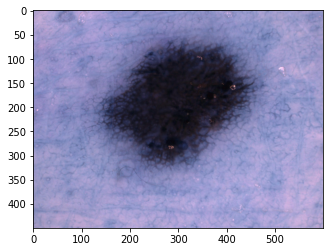

Imagem: 7985
largura: 450, altura: 600, canais: 3


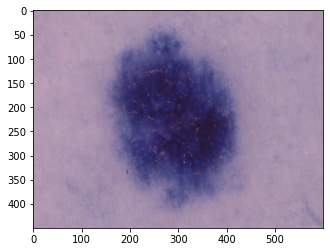

Imagem: 7986
largura: 450, altura: 600, canais: 3


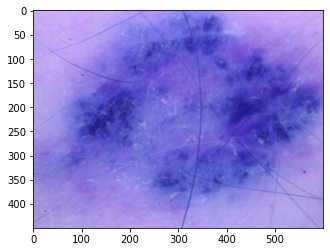

Imagem: 7987
largura: 450, altura: 600, canais: 3


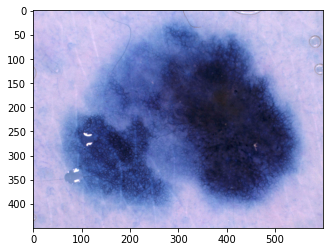

Imagem: 7988
largura: 450, altura: 600, canais: 3


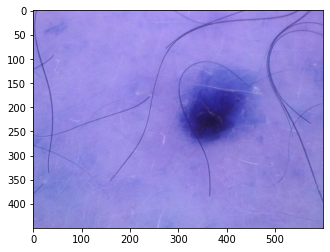

In [19]:
altura=[]
largura=[]
canal=[]
  
for i in range(7983,7988):
  print("Imagem:",i+1)
  x,y,z=imagens[i].shape
  largura.append(x)
  altura.append(y)
  canal.append(z)
  print('largura: ' + str(x) + ', altura: ' + str(y) + ', canais: '+ str(z))
  plt.imshow(imagens[i])
  plt.show()

## 4. Análise/Exploração dos Dados



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image

In [2]:
!pwd

/Users/cesaraugustosiqueirasantos/Documents/POS/TCC_Stricto_Sensu


In [3]:
pele_df = pd.read_csv('dataset_final/classificacao_dataset.csv')
print(pele_df.head())
np.random.seed(42)

SIZE=224

   Unnamed: 0      image_id type
0           0  ISIC_0024698   nv
1           1  ISIC_0024693   nv
2           2  ISIC_0025964  mel
3           3  ISIC_0030623  mel
4           4  ISIC_0027190  mel


In [4]:
pele_df_img = pele_df.copy()

In [5]:
image_path = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join('dataset_final', '*', '*.jpg'))}
#Define the path and add as a new column
pele_df_img['path'] = pele_df['image_id'].map(image_path.get)
#Use the path to read images.
pele_df_img['imagem'] = pele_df_img['path'].map(lambda x: np.asarray(Image.open(x).resize((SIZE,SIZE))))

pele_df_img.head()

,Unnamed: 0,image_id,type,path,imagem
0,0,ISIC_0024698,nv,dataset_final/imagens/ISIC_0024698.jpg,"[[[162, 137, 164], [163, 137, 165], [164, 138,..."
1,1,ISIC_0024693,nv,dataset_final/imagens/ISIC_0024693.jpg,"[[[230, 149, 166], [233, 150, 167], [231, 147,..."
2,2,ISIC_0025964,mel,dataset_final/imagens/ISIC_0025964.jpg,"[[[125, 102, 106], [129, 106, 109], [137, 109,..."
3,3,ISIC_0030623,mel,dataset_final/imagens/ISIC_0030623.jpg,"[[[203, 172, 190], [201, 172, 188], [200, 173,..."
4,4,ISIC_0027190,mel,dataset_final/imagens/ISIC_0027190.jpg,"[[[130, 108, 129], [132, 110, 130], [133, 113,..."


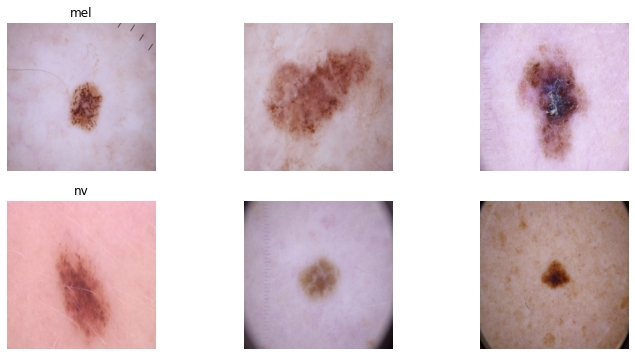

In [8]:
num_exemplos = 3  

# Plot
fig, m_axs = plt.subplots(2, num_exemplos, figsize = (4*num_exemplos, 2*3))
for n_axs, (type_name, type_rows) in zip(m_axs, 
                                         pele_df_img.sort_values(['type']).groupby('type')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(num_exemplos, random_state=64).iterrows()):
        c_ax.imshow(c_row['imagem'])
        c_ax.axis('off')


## 5. Criação do Modelo de ML

### Testando Diversos Modelos

In [1]:
import os 
import pandas as pd
import numpy as np
import tensorflow as tf 
import shutil
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import layers 
from tensorflow.keras import Model 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from glob import glob
from PIL import Image

import ssl

ssl._create_default_https_context = ssl._create_unverified_context


In [2]:
#Setting Global Variables
FINAL_PATH = "dataset_final//imagens//"

TRAIN_PATH = "dataset_final//train//"

TEST_PATH = "dataset_final//test//"

SIZE=224

In [3]:
pele_df = pd.read_csv('dataset_final/classificacao_dataset.csv')


le = LabelEncoder()
le.fit(pele_df['type'])
LabelEncoder()
print('label 0 é igual á ' + list(le.classes_)[0])
print('label 1 é igual á ' + list(le.classes_)[1])

pele_df['label'] = le.transform(pele_df["type"]) 

print(pele_df['label'].value_counts())

print(pele_df.head())

label 0 é igual á mel
label 1 é igual á nv
1    6805
0    1183
Name: label, dtype: int64
   Unnamed: 0      image_id type  label
0           0  ISIC_0024698   nv      1
1           1  ISIC_0024693   nv      1
2           2  ISIC_0025964  mel      0
3           3  ISIC_0030623  mel      0
4           4  ISIC_0027190  mel      0


In [5]:
pele_df_final = pele_df.copy()

image_path = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join('dataset_final', '*', '*.jpg'))}

#Definindo o diretório como uma nova coluna
pele_df_final['path'] = pele_df['image_id'].map(image_path.get)

#Usar o dataframe completo estava levando muito tempo, portanto tive de quebra-lo num fração menor, ainda com mais de 2000 linhas
pele_df_final_frac = pele_df_final.sample(frac=0.35)

print(pele_df_final_frac['type'].value_counts())

X = pele_df_final_frac['path']
Y = pele_df_final_frac['type'] #Assign label values to Y

nv     2395
mel     401
Name: type, dtype: int64


In [8]:
print(f'Valores únicos para Y: {list(set(Y))}')

x_train_auto, x_test_auto, y_train_auto, y_test_auto = train_test_split(X, Y, test_size=0.20, random_state=42)

print(f'x_train_auto: {x_train_auto[0:5]}')
print(f'x_test_auto: {x_test_auto[0:5]}')
print(f'y_train_auto: {y_train_auto[0:5]}')
print(f'y_test_auto: {y_test_auto[0:5]}')

Valores únicos para Y: ['nv', 'mel']
x_train_auto: 972     dataset_final/imagens/ISIC_0028567.jpg
7863          dataset_final/imagens/586355.jpg
7838          dataset_final/imagens/363475.jpg
4873    dataset_final/imagens/ISIC_0027264.jpg
1461    dataset_final/imagens/ISIC_0028539.jpg
Name: path, dtype: object
x_test_auto: 6180    dataset_final/imagens/ISIC_0033390.jpg
4795    dataset_final/imagens/ISIC_0028417.jpg
7595    dataset_final/imagens/ISIC_0033247.jpg
207     dataset_final/imagens/ISIC_0024496.jpg
3513    dataset_final/imagens/ISIC_0026063.jpg
Name: path, dtype: object
y_train_auto: 972     mel
7863    mel
7838    mel
4873     nv
1461     nv
Name: type, dtype: object
y_test_auto: 6180     nv
4795     nv
7595     nv
207     mel
3513     nv
Name: type, dtype: object


In [6]:
df_train = pd.DataFrame(columns=['image_path','type'])
df_train['image_path'] = x_train_auto
df_train['type'] = y_train_auto

df_test = pd.DataFrame(columns=['image_path','type'])
df_test['image_path'] = x_test_auto
df_test['type'] = y_test_auto

In [7]:
#Creating a directory for Train 
for n, row in df_train.iterrows():
    if row['type']=='mel':
        shutil.copy2(row['image_path'], TRAIN_PATH + 'mel//')
    else: 
        shutil.copy2(row['image_path'], TRAIN_PATH+ 'nv//')

In [8]:
#Creating a directory for Test
for n, row in df_test.iterrows():
    if row['type']=='mel':
        shutil.copy2(row['image_path'], TEST_PATH + 'mel//')
    else: 
        shutil.copy2(row['image_path'], TEST_PATH+ 'nv//')

In [147]:
files = ["{}/{}".format(FINAL_PATH, fi) for fi in os.listdir(FINAL_PATH) if fi.endswith("jpg")]

In [158]:
def get_image_data(filename):
    img = Image.open(filename)
    img.load()
    data = np.asarray(img, dtype="int32")
    return data
    
def plot_N(indices, savename=None):    
    f, axarr = plt.subplots(len(indices) // 5, 5)
    f.set_size_inches(14, 14)
    f.subplots_adjust(wspace=0.2, hspace=0, left=0, right=1, top=0.4, bottom=0)
    for i in range(len(indices)):
        axarr[i // 5, i % 5].axis("off")
        axarr[i // 5, i % 5].imshow(get_image_data(files[indices[i]]))
    if savename is not None:
        f.savefig('./imagens_resultados/' + str(savename))

### Testing VGG-16

In [117]:
SIZE = 224

In [118]:
# Image Augmentation

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

In [119]:
# Training and Validation Sets
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(TRAIN_PATH, batch_size = 20, class_mode = 'binary', target_size = (SIZE, SIZE))

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(TEST_PATH,  batch_size = 20, class_mode = 'binary', target_size = (SIZE, SIZE))

Found 2236 images belonging to 2 classes.
Found 560 images belonging to 2 classes.


In [120]:
# Loading the Base Model
from keras.applications.vgg16 import VGG16

base_model = VGG16(input_shape = (SIZE, SIZE, 3), # Shape of our images
include_top = True, # Leave out the last fully connected layer
weights = 'imagenet')

for layer in base_model.layers:
    layer.trainable = False

In [121]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(1, activation='sigmoid')(x)
model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001), loss = 'binary_crossentropy',metrics = ['acc'])

In [122]:
vgghist = model.fit(train_generator, validation_data = validation_generator, validation_steps= 8, batch_size=20, steps_per_epoch = 20, epochs = 8)

Epoch 1/8
20/20 [==============================] - 257s 12s/step - loss: 0.6786 - acc: 0.8625 - val_loss: 0.6735 - val_acc: 0.7937
Epoch 2/8
20/20 [==============================] - 211s 11s/step - loss: 0.6587 - acc: 0.8825 - val_loss: 0.6538 - val_acc: 0.8500
Epoch 3/8
20/20 [==============================] - 205s 10s/step - loss: 0.6465 - acc: 0.8475 - val_loss: 0.6389 - val_acc: 0.8500
Epoch 4/8
20/20 [==============================] - 163s 8s/step - loss: 0.6304 - acc: 0.8550 - val_loss: 0.6311 - val_acc: 0.8125
Epoch 5/8
20/20 [==============================] - 156s 8s/step - loss: 0.6179 - acc: 0.8425 - val_loss: 0.6175 - val_acc: 0.8125
Epoch 6/8
20/20 [==============================] - 153s 8s/step - loss: 0.6002 - acc: 0.8500 - val_loss: 0.6026 - val_acc: 0.8188
Epoch 7/8
20/20 [==============================] - 156s 8s/step - loss: 0.5924 - acc: 0.8325 - val_loss: 0.5805 - val_acc: 0.8438
Epoch 8/8
20/20 [==============================] - 177s 9s/step - loss: 0.5895 - acc: 0

## Testing Inception

In [96]:
SIZE = 150

In [97]:
# Data Augmentation
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255., rotation_range = 40, width_shift_range = 0.2,
 height_shift_range = 0.2,shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

test_datagen = ImageDataGenerator( rescale = 1.0/255. )

In [98]:
# Training and Validation Generators

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(TRAIN_PATH, batch_size = 20, class_mode = 'binary', target_size = (SIZE, SIZE))

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(TEST_PATH,  batch_size = 20, class_mode = 'binary', target_size = (SIZE, SIZE))

Found 2236 images belonging to 2 classes.
Found 560 images belonging to 2 classes.


In [99]:
# Loading the Base Model
from tensorflow.keras.applications.inception_v3 import InceptionV3

base_model = InceptionV3(input_shape = (SIZE, SIZE, 3), include_top = False, weights = 'imagenet')

In [100]:
# Compile and Fit

for layer in base_model.layers:
    layer.trainable = False

from tensorflow.keras.optimizers import RMSprop

x = layers.Flatten()(base_model.output)
x = layers.Dense(18432, activation='relu')(x)
x = layers.Dropout(0.2)(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = RMSprop(learning_rate=0.0001), loss = 'binary_crossentropy', metrics = ['acc'])

In [101]:
inc_history = model.fit(train_generator, validation_data = validation_generator, validation_steps= 8,  batch_size=20, steps_per_epoch = 20, epochs = 8)

Epoch 1/8
20/20 [==============================] - 275s 13s/step - loss: 5.0370 - acc: 0.7725 - val_loss: 2.5116 - val_acc: 0.4750
Epoch 2/8
20/20 [==============================] - 241s 12s/step - loss: 2.0114 - acc: 0.7800 - val_loss: 0.8267 - val_acc: 0.8562
Epoch 3/8
20/20 [==============================] - 308s 16s/step - loss: 1.6046 - acc: 0.7900 - val_loss: 2.3467 - val_acc: 0.5375
Epoch 4/8
20/20 [==============================] - 162s 8s/step - loss: 1.4937 - acc: 0.7675 - val_loss: 1.6401 - val_acc: 0.8313
Epoch 5/8
20/20 [==============================] - 126s 6s/step - loss: 1.2371 - acc: 0.8250 - val_loss: 1.9962 - val_acc: 0.4688
Epoch 6/8
20/20 [==============================] - 136s 7s/step - loss: 1.1139 - acc: 0.8000 - val_loss: 0.5711 - val_acc: 0.7500
Epoch 7/8
20/20 [==============================] - 119s 6s/step - loss: 1.2460 - acc: 0.7875 - val_loss: 0.9431 - val_acc: 0.8313
Epoch 8/8
20/20 [==============================] - 115s 6s/step - loss: 0.8391 - acc: 0

## Testing ResNet50

In [78]:
SIZE=224

In [79]:
# Data Augmentation and Generators
# Add our data-augmentation parameters to ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255., rotation_range = 40, width_shift_range = 0.2,
 height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1.0/255.)

In [80]:

train_generator = train_datagen.flow_from_directory(TRAIN_PATH, batch_size = 20, class_mode = 'binary', target_size = (SIZE, SIZE))

validation_generator = test_datagen.flow_from_directory(TEST_PATH, batch_size = 20, class_mode = 'binary', target_size = (SIZE, SIZE))

Found 2236 images belonging to 2 classes.
Found 560 images belonging to 2 classes.


In [81]:
#Import the base model
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(input_shape=(SIZE, SIZE,3), include_top=False, weights="imagenet")

for layer in base_model.layers:
    layer.trainable = False

In [82]:
# Build and Compile the Model
from tensorflow.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten

base_model = Sequential()
base_model.add(ResNet50(include_top=False, weights='imagenet', pooling='max'))
base_model.add(Dense(1, activation='sigmoid'))

#opt = keras.optimizer_v2.gradient_descent.SGD(learning_rate=0.0001)
base_model.compile(optimizer = 'SGD', loss = 'binary_crossentropy', metrics = ['acc'])

In [83]:
resnet_history = base_model.fit(train_generator, batch_size=20, validation_data = validation_generator, validation_steps= 8, 
steps_per_epoch = 20, epochs = 8)

Epoch 1/8
20/20 [==============================] - 295s 15s/step - loss: 5.8954 - acc: 0.7850 - val_loss: 56.9488 - val_acc: 0.8562
Epoch 2/8
20/20 [==============================] - 329s 16s/step - loss: 1.9607 - acc: 0.8150 - val_loss: 61.6931 - val_acc: 0.8062
Epoch 3/8
20/20 [==============================] - 268s 13s/step - loss: 0.4794 - acc: 0.8325 - val_loss: 9.2560 - val_acc: 0.8375
Epoch 4/8
20/20 [==============================] - 293s 15s/step - loss: 0.7408 - acc: 0.8225 - val_loss: 1.2327 - val_acc: 0.8500
Epoch 5/8
20/20 [==============================] - 256s 13s/step - loss: 1.7011 - acc: 0.8500 - val_loss: 5.4125 - val_acc: 0.8062
Epoch 6/8
20/20 [==============================] - 239s 12s/step - loss: 0.4892 - acc: 0.8611 - val_loss: 160.2126 - val_acc: 0.8062
Epoch 7/8
20/20 [==============================] - 251s 13s/step - loss: 2.6202 - acc: 0.8150 - val_loss: 0.4813 - val_acc: 0.8438
Epoch 8/8
20/20 [==============================] - 307s 16s/step - loss: 0.4083

### CNN com Tensorflow

In [106]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

In [107]:
SIZE = 224

In [108]:
# Data Augmentation and Generators
# Add our data-augmentation parameters to ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255., rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1.0/255.)

In [109]:
train_generator = train_datagen.flow_from_directory(TRAIN_PATH, batch_size = 20, class_mode = 'binary', target_size = (SIZE, SIZE))

validation_generator = test_datagen.flow_from_directory(TEST_PATH, batch_size = 20, class_mode = 'binary', target_size = (SIZE, SIZE))

Found 2236 images belonging to 2 classes.
Found 560 images belonging to 2 classes.


In [110]:
model = tf.keras.models.Sequential([
# Note the input shape is the desired size of the image 200x200 with 3 bytes color
# This is the first convolution
tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(SIZE, SIZE, 3)),
tf.keras.layers.MaxPooling2D(2, 2),
# The second convolution
tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
# The third convolution
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
# The fourth convolution
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
# # The fifth convolution
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
# Flatten the results to feed into a DNN
tf.keras.layers.Flatten(),
# 512 neuron hidden layer
tf.keras.layers.Dense(512, activation='relu'),
# Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('dandelions') and 1 for the other ('grass')
tf.keras.layers.Dense(1, activation='sigmoid')
])

In [111]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='binary_crossentropy',
optimizer=RMSprop(learning_rate=0.001),
metrics='accuracy')


In [112]:
cnn_history = model.fit(train_generator, steps_per_epoch=20, epochs=8, verbose=1, validation_data = validation_generator, validation_steps=8)

Epoch 1/8
20/20 [==============================] - 32s 1s/step - loss: 0.5015 - accuracy: 0.8400 - val_loss: 0.4762 - val_accuracy: 0.8062
Epoch 2/8
20/20 [==============================] - 27s 1s/step - loss: 0.3557 - accuracy: 0.8975 - val_loss: 0.4589 - val_accuracy: 0.8188
Epoch 3/8
20/20 [==============================] - 27s 1s/step - loss: 0.4012 - accuracy: 0.8625 - val_loss: 0.4231 - val_accuracy: 0.8438
Epoch 4/8
20/20 [==============================] - 26s 1s/step - loss: 0.4053 - accuracy: 0.8600 - val_loss: 0.6167 - val_accuracy: 0.8313
Epoch 5/8
20/20 [==============================] - 28s 1s/step - loss: 0.4587 - accuracy: 0.8275 - val_loss: 0.5814 - val_accuracy: 0.8188
Epoch 6/8
20/20 [==============================] - 25s 1s/step - loss: 0.4259 - accuracy: 0.8450 - val_loss: 0.5031 - val_accuracy: 0.7937
Epoch 7/8
20/20 [==============================] - 25s 1s/step - loss: 0.3911 - accuracy: 0.8675 - val_loss: 0.3730 - val_accuracy: 0.8562
Epoch 8/8
20/20 [==========

## 6. Interpretação dos Resultados

Para análise do modelo, utilizei dos seguintes conceitos: 

* Coeficiente de Perda
* Acurácia
* Curva ROC

### VGG16

In [124]:
#VGG16
model.evaluate(validation_generator)

28/28 [==============================] - 210s 7s/step - loss: 0.5731 - acc: 0.8304


[0.5730776190757751, 0.8303571343421936]

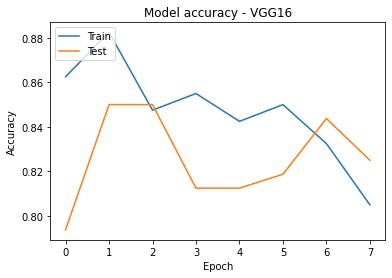

In [132]:
plt.plot(vgghist.history['acc'])
plt.plot(vgghist.history['val_acc'])
plt.title('Model accuracy - VGG16')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [94]:
STEP_SIZE_TEST=validation_generator.n//validation_generator.batch_size
validation_generator.reset()
preds = model.predict(validation_generator,
verbose=1)

28/28 [==============================] - 254s 9s/step


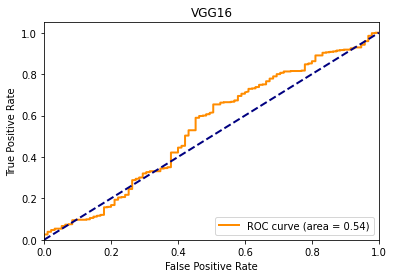

In [95]:
fpr, tpr, _ = roc_curve(validation_generator.classes, preds)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('VGG16')
plt.legend(loc="lower right")
plt.show()

### InceptionV3

In [102]:
# Inceptionv3
model.evaluate(validation_generator)

28/28 [==============================] - 29s 1s/step - loss: 1.4936 - acc: 0.8304


[1.493645191192627, 0.8303571343421936]

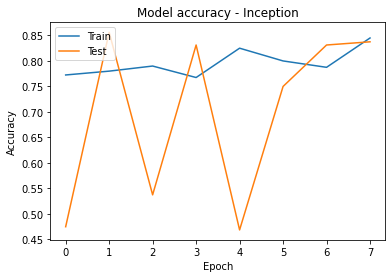

In [133]:
plt.plot(inc_history.history['acc'])
plt.plot(inc_history.history['val_acc'])
plt.title('Model accuracy - Inception')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [103]:
STEP_SIZE_TEST=validation_generator.n//validation_generator.batch_size
validation_generator.reset()
preds = model.predict(validation_generator,
verbose=1)

28/28 [==============================] - 27s 896ms/step


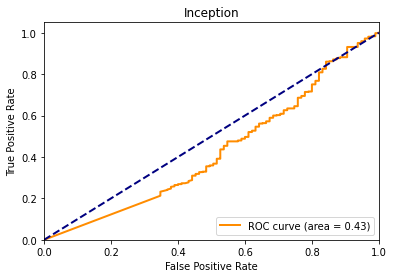

In [104]:
fpr, tpr, _ = roc_curve(validation_generator.classes, preds)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Inception')
plt.legend(loc="lower right")
plt.show()

### ResNet50

In [84]:
# ResNet50
model.evaluate(validation_generator)

28/28 [==============================] - 14s 504ms/step - loss: 0.8233 - accuracy: 0.8304


[0.8233284950256348, 0.8303571343421936]

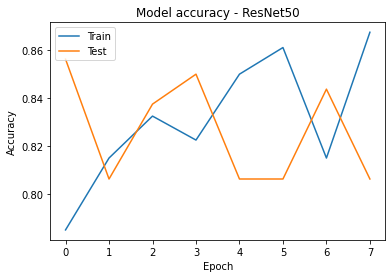

In [134]:
plt.plot(resnet_history.history['acc'])
plt.plot(resnet_history.history['val_acc'])
plt.title('Model accuracy - ResNet50')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [85]:
STEP_SIZE_TEST=validation_generator.n//validation_generator.batch_size
validation_generator.reset()
preds = model.predict(validation_generator,
verbose=1)

28/28 [==============================] - 12s 420ms/step


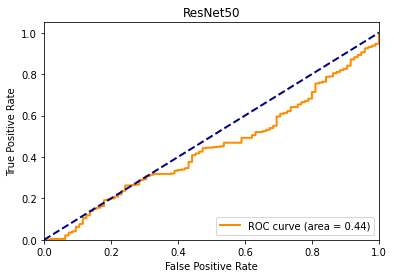

In [86]:
fpr, tpr, _ = roc_curve(validation_generator.classes, preds)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ResNet50')
plt.legend(loc="lower right")
plt.show()

### CNN Manualmente Composto

In [113]:
model.evaluate(validation_generator)

28/28 [==============================] - 9s 302ms/step - loss: 0.4076 - accuracy: 0.8304


[0.4075634777545929, 0.8303571343421936]

In [114]:
STEP_SIZE_TEST=validation_generator.n//validation_generator.batch_size
validation_generator.reset()
preds = model.predict(validation_generator,
verbose=1)

28/28 [==============================] - 9s 298ms/step


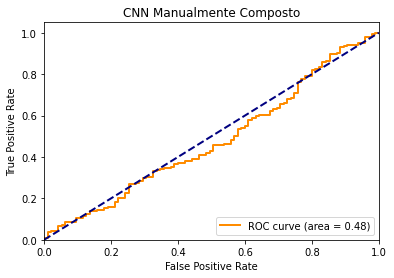

In [115]:
fpr, tpr, _ = roc_curve(validation_generator.classes, preds)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('CNN Manualmente Composto')
plt.legend(loc="lower right")
plt.show()


## 7. Comunicação dos Resultados

In [38]:
!pwd

/Users/cesaraugustosiqueirasantos/Documents/POS/tcc_pos


Por favor visite o Documento: 

https://github.com/cesaraugusto98/TCC_Stricto_Sensu/blob/main/Imagens/TCC-workflow-canvas.png

## 8. Referencias
Tschandl, Philipp, 2018, "The HAM10000 dataset, a large collection of multi-source dermatoscopic images of common pigmented skin lesions", https://doi.org/10.7910/DVN/DBW86T, Harvard Dataverse, V3, UNF:6:/APKSsDGVDhwPBWzsStU5A== [fileUNF]

I. Giotis, N. Molders, S. Land, M. Biehl, M.F. Jonkman and N. Petkov: "MED-NODE: A computer-assisted melanoma diagnosis system using non-dermoscopic images", Expert Systems with Applications, 42 (2015), 6578-6585 

Skin cancer detection: Applying a deep learning based model driven architecture in the cloud for classifying dermal cell images | https://www.sciencedirect.com/science/article/pii/S2352914819302047

PH2 dataset | https://www.fc.up.pt/addi/ph2%20database.html


Aprendizagem Profunda Aplicada a Identificação de melanoma | https://tedebc.ufma.br/jspui/bitstream/tede/2578/2/LucasMaia.pdf

Github Project - Skin Cancer detection |
https://github.com/Tirth27/Skin-Cancer-Classification-using-Deep-Learning

Good keras gudie | https://www.analyticsvidhya.com/blog/2020/10/create-image-classification-model-python-keras/

MACHINE LEARNING WITH PYTHON: TRAIN YOUR OWN IMAGE CLASSIFICATION MODEL WITH KERAS AND TENSORFLOW | https://mlconference.ai/blog/machine-learning-with-python/

Single Label Imagem Classification | https://blog.workaround.vercel.app/blog/single-label-image-classification-with-keras

Top 4 Pre-Trained Models for Image Classification with Python Code | https://www.analyticsvidhya.com/blog/2020/08/top-4-pre-trained-models-for-image-classification-with-python-code/

Binary Image Classification | https://www.analyticsvidhya.com/blog/2021/06/binary-image-classifier-using-pytorch/

CNN Binary Image Classifier in TensorFlow | https://towardsdatascience.com/10-minutes-to-building-a-cnn-binary-image-classifier-in-tensorflow-4e216b2034aa

Different Types od CNN Models | https://iq.opengenus.org/different-types-of-cnn-models/

A Data Science Workflow Canvas to Kickstart Your Projects | https://towardsdatascience.com/a-data-science-workflow-canvas-to-kickstart-your-projects-db62556be4d0